In [21]:
import numpy;
import matplotlib.pyplot as plt;

from tensorflow.keras.initializers import TruncatedNormal;

from tqdm import tqdm;

In [22]:
# Training data
feature = numpy.array(
    [
        [0.08, 0.72], [0.26, 0.58], [0.45, 0.15], 
        [0.60, 0.30], [0.10, 1.0], [0.35, 0.95], 
        [0.70, 0.65], [0.92, 0.45]
    ]);

label = numpy.array([1, 1, 1, 1, -1, -1, -1, -1]);

In [23]:
class AdalineLMS:

    # Hyperparameters
    def __init__(self, feature, label):
        
        self.learning_rate = 1e-1;
        self.epoch = 200;

        initializer = TruncatedNormal(mean = 0.5, stddev = 0.02)(shape = (1, 3)).numpy();

        # Weight initial
        self.weight_x1 = initializer[0][0];
        self.weight_x2 = initializer[0][1];

        # Bias just in case
        self.bias = initializer[0][2];

        # Load dataset
        self.feature = feature;
        self.label = label;
    
        print("AdalineLMS initial configuration:");
        print(f"weight x1 {self.weight_x1} - weight x2: {self.weight_x2} - bias: {self.bias}");
        print("\n\n\n");

    # Mean Squared Error
    def _mse(self, prediction):
        return numpy.mean((self.label - prediction) ** 2);

    # Feed Forward process
    def forward(self):
        predictions = [];

        for i in self.feature:
            prediction = (self.weight_x1 * i[0]) + (self.weight_x2 * i[1]) + self.bias;

            predictions.append(prediction);

        return predictions;

    # Learning Rule: LMS Implementation
    def learning_rule(self, predictions):

        # new weight x1 = current weight + (learning rate x (ground truth - prediction) x x1
        for i in tqdm(range(len(self.feature))):
            truth_difference = (self.label[i] - predictions[i]);

            new_weight_x1 = (self.weight_x1 + (self.learning_rate * truth_difference * self.feature[i][0]));
            new_weight_x2 = (self.weight_x2 + (self.learning_rate * truth_difference * self.feature[i][1]));
            new_bias = self.learning_rate * truth_difference;

            # print(f"new_weight_x1: {new_weight[0]} - new_weight_x2: {new_weight[1]}")
    
            self.weight_x1 = new_weight_x1;
            self.weight_x2 = new_weight_x2;
            self.bias = new_bias;
    
    def train(self):

        loss_history = [];
        
        # Loop 200 epochs
        for i in range(self.epoch):
            
            print(f"Epoch [{i + 1} / {self.epoch}] -", end = " ");

            loss = 0.0;

            # Forward pass 
            predictions = self.forward();

            # Count current epoch's loss
            loss = self._mse(predictions);

            # Apply LMS to update weight
            self.learning_rule(predictions);
                

            loss_history.append(loss);
            print(f"Epoch {i + 1} - loss: {round(loss, 4)} - weight x1: {self.weight_x1} - weight x2: {self.weight_x2}\n");

         # Plotting MSE curve
        plt.figure(figsize=(10, 6));
        plt.plot(range(self.epoch), loss_history, label='MSE');
        plt.xlabel('Epoch');
        plt.ylabel('Mean Squared Error');
        plt.title('MSE over Epochs');
        plt.legend();
        plt.show()           


AdalineLMS initial configuration:
weight x1 0.5077690482139587 - weight x2: 0.4978870749473572 - bias: 0.5014121532440186




Epoch [1 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 1 - loss: 2.3066 - weight x1: 0.071876073229313 - weight x2: -0.13602766609549521

Epoch [2 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7987.25it/s]


Epoch 2 - loss: 1.0434 - weight x1: 0.08851305341315589 - weight x2: -0.1258749931140568

Epoch [3 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 3 - loss: 0.9903 - weight x1: 0.05118236817915103 - weight x2: -0.18972815725561093

Epoch [4 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7981.55it/s]


Epoch 4 - loss: 0.9855 - weight x1: 0.03848857443810169 - weight x2: -0.21699804638144002

Epoch [5 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 3980.36it/s]


Epoch 5 - loss: 0.9805 - weight x1: 0.03052166481245812 - weight x2: -0.23630533640776463

Epoch [6 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 6 - loss: 0.979 - weight x1: 0.027070318225950366 - weight x2: -0.24823474864837713

Epoch [7 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 7 - loss: 0.978 - weight x1: 0.025943361210285176 - weight x2: -0.25608041258063474

Epoch [8 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 8 - loss: 0.9776 - weight x1: 0.026186739675689658 - weight x2: -0.26132702099251065

Epoch [9 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 9 - loss: 0.9774 - weight x1: 0.027167459020989368 - weight x2: -0.2649679589372032

Epoch [10 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 10 - loss: 0.9773 - weight x1: 0.028520959398097942 - weight x2: -0.2675928783644829

Epoch [11 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 11 - loss: 0.9772 - weight x1: 0.030031385675524144 - weight x2: -0.2695652343141314

Epoch [12 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 12 - loss: 0.9772 - weight x1: 0.03157458441465723 - weight x2: -0.27110796838271356

Epoch [13 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7932.49it/s]


Epoch 13 - loss: 0.9772 - weight x1: 0.033080952906036395 - weight x2: -0.27235922848330196

Epoch [14 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 14 - loss: 0.9772 - weight x1: 0.03451347428517723 - weight x2: -0.2734054549033851

Epoch [15 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 15 - loss: 0.9773 - weight x1: 0.03585438432028462 - weight x2: -0.2743015506568638

Epoch [16 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 16 - loss: 0.9773 - weight x1: 0.0370971565118904 - weight x2: -0.2750830934190059

Epoch [17 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 17 - loss: 0.9773 - weight x1: 0.0382416856598929 - weight x2: -0.2757737521804103

Epoch [18 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8002.49it/s]


Epoch 18 - loss: 0.9774 - weight x1: 0.03929140712654096 - weight x2: -0.2763897950961477

Epoch [19 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 19 - loss: 0.9774 - weight x1: 0.040251584201063104 - weight x2: -0.2769428356037326

Epoch [20 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 20 - loss: 0.9774 - weight x1: 0.0411282998203016 - weight x2: -0.2774415104388669

Epoch [21 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 21 - loss: 0.9774 - weight x1: 0.04192787207580688 - weight x2: -0.2778925097103899

Epoch [22 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8006.31it/s]


Epoch 22 - loss: 0.9775 - weight x1: 0.042656523922302625 - weight x2: -0.27830121346789227

Epoch [23 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 23 - loss: 0.9775 - weight x1: 0.04332020464059155 - weight x2: -0.2786720888968669

Epoch [24 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 24 - loss: 0.9775 - weight x1: 0.043924501233092134 - weight x2: -0.2790089415474622

Epoch [25 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 25 - loss: 0.9775 - weight x1: 0.04447460250354347 - weight x2: -0.27931507723392907

Epoch [26 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 26 - loss: 0.9775 - weight x1: 0.044975293431644386 - weight x2: -0.2795934089759831

Epoch [27 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 27 - loss: 0.9775 - weight x1: 0.04543096643373511 - weight x2: -0.2798465298674506

Epoch [28 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 28 - loss: 0.9776 - weight x1: 0.045845641523667324 - weight x2: -0.28007676458710673

Epoch [29 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8042.77it/s]


Epoch 29 - loss: 0.9776 - weight x1: 0.04622299065889647 - weight x2: -0.28028620731433035

Epoch [30 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 30 - loss: 0.9776 - weight x1: 0.04656636352604454 - weight x2: -0.2804767508085334

Epoch [31 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 31 - loss: 0.9776 - weight x1: 0.0468788132024275 - weight x2: -0.28065010958772485

Epoch [32 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 32 - loss: 0.9776 - weight x1: 0.047163120836800895 - weight x2: -0.2808078390327865

Epoch [33 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 33 - loss: 0.9776 - weight x1: 0.047421818912314964 - weight x2: -0.2809513515683848

Epoch [34 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 34 - loss: 0.9776 - weight x1: 0.047657212901393464 - weight x2: -0.2810819306583792

Epoch [35 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 35 - loss: 0.9776 - weight x1: 0.047871401264909755 - weight x2: -0.28120074309984266

Epoch [36 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 36 - loss: 0.9776 - weight x1: 0.04806629382830098 - weight x2: -0.28130884994283406

Epoch [37 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 5305.05it/s]


Epoch 37 - loss: 0.9776 - weight x1: 0.04824362861031031 - weight x2: -0.28140721626497334

Epoch [38 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 38 - loss: 0.9776 - weight x1: 0.048404987201067964 - weight x2: -0.2814967199676963

Epoch [39 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 39 - loss: 0.9776 - weight x1: 0.04855180879435922 - weight x2: -0.2815781597208906

Epoch [40 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 6187.43it/s]


Epoch 40 - loss: 0.9776 - weight x1: 0.048685402979683434 - weight x2: -0.28165226215597866

Epoch [41 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 41 - loss: 0.9776 - weight x1: 0.048806961396366394 - weight x2: -0.28171968838928674

Epoch [42 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8019.70it/s]


Epoch 42 - loss: 0.9777 - weight x1: 0.04891756834651596 - weight x2: -0.2817810399445896

Epoch [43 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 43 - loss: 0.9777 - weight x1: 0.04901821045714985 - weight x2: -0.2818368641341369

Epoch [44 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 44 - loss: 0.9777 - weight x1: 0.049109785475059065 - weight x2: -0.2818876589500827

Epoch [45 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8008.22it/s]


Epoch 45 - loss: 0.9777 - weight x1: 0.049193110271268714 - weight x2: -0.28193387751232385

Epoch [46 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 46 - loss: 0.9777 - weight x1: 0.04926892812553674 - weight x2: -0.2819759321138599

Epoch [47 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 47 - loss: 0.9777 - weight x1: 0.049337915355287615 - weight x2: -0.2820141979006299

Epoch [48 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 48 - loss: 0.9777 - weight x1: 0.049400687347760194 - weight x2: -0.28204901621917766

Epoch [49 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 49 - loss: 0.9777 - weight x1: 0.04945780404896592 - weight x2: -0.2820806976623268

Epoch [50 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 5296.67it/s]


Epoch 50 - loss: 0.9777 - weight x1: 0.04950977495829077 - weight x2: -0.282109524840226

Epoch [51 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 51 - loss: 0.9777 - weight x1: 0.049557063673216134 - weight x2: -0.2821357549016013

Epoch [52 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]

Epoch 52 - loss: 0.9777 - weight x1: 0.04960009202465236 - weight x2: -0.2821596218277747

Epoch [53 / 200] - 


100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 53 - loss: 0.9777 - weight x1: 0.049639243839744315 - weight x2: -0.2821813385199564

Epoch [54 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 54 - loss: 0.9777 - weight x1: 0.04967486836569705 - weight x2: -0.282201098698456

Epoch [55 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 55 - loss: 0.9777 - weight x1: 0.04970728338515332 - weight x2: -0.28221907863076945

Epoch [56 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 56 - loss: 0.9777 - weight x1: 0.049736778050906136 - weight x2: -0.2822354387039663

Epoch [57 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 57 - loss: 0.9777 - weight x1: 0.049763615465229366 - weight x2: -0.2822503248554096

Epoch [58 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 5294.17it/s]


Epoch 58 - loss: 0.9777 - weight x1: 0.049788035026832766 - weight x2: -0.2822638698745742

Epoch [59 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 59 - loss: 0.9777 - weight x1: 0.04981025456637524 - weight x2: -0.2822761945875786

Epoch [60 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 60 - loss: 0.9777 - weight x1: 0.049830472289585245 - weight x2: -0.2822874089349968

Epoch [61 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8004.40it/s]


Epoch 61 - loss: 0.9777 - weight x1: 0.049848868545321154 - weight x2: -0.2822976129525674

Epoch [62 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 62 - loss: 0.9777 - weight x1: 0.04986560743434268 - weight x2: -0.28230689766354655

Epoch [63 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7996.77it/s]


Epoch 63 - loss: 0.9777 - weight x1: 0.04988083827314409 - weight x2: -0.28231534589066704

Epoch [64 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 64 - loss: 0.9777 - weight x1: 0.0498946969259071 - weight x2: -0.28232303299494454

Epoch [65 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 65 - loss: 0.9777 - weight x1: 0.04990730701645475 - weight x2: -0.2823300275479241

Epoch [66 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 66 - loss: 0.9777 - weight x1: 0.04991878103101706 - weight x2: -0.2823363919433607

Epoch [67 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 67 - loss: 0.9777 - weight x1: 0.04992922132164611 - weight x2: -0.2823421829537931

Epoch [68 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 68 - loss: 0.9777 - weight x1: 0.049938721019230234 - weight x2: -0.2823474522369738

Epoch [69 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 69 - loss: 0.9777 - weight x1: 0.04994736486425293 - weight x2: -0.28235224679667315

Epoch [70 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8000.58it/s]


Epoch 70 - loss: 0.9777 - weight x1: 0.04995522996270632 - weight x2: -0.2823566094019693

Epoch [71 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 14762.18it/s]


Epoch 71 - loss: 0.9777 - weight x1: 0.049962386473902304 - weight x2: -0.2823605789687625

Epoch [72 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 72 - loss: 0.9777 - weight x1: 0.04996889823631723 - weight x2: -0.28236419090691767

Epoch [73 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 73 - loss: 0.9777 - weight x1: 0.04997482333705236 - weight x2: -0.2823674774361327

Epoch [74 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 74 - loss: 0.9777 - weight x1: 0.04998021462999029 - weight x2: -0.28237046787334885

Epoch [75 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 75 - loss: 0.9777 - weight x1: 0.049985120207269446 - weight x2: -0.2823731888942674

Epoch [76 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 76 - loss: 0.9777 - weight x1: 0.04998958382828181 - weight x2: -0.2823756647713061

Epoch [77 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 77 - loss: 0.9777 - weight x1: 0.04999364531002155 - weight x2: -0.28237791759011727

Epoch [78 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8008.22it/s]


Epoch 78 - loss: 0.9777 - weight x1: 0.04999734088226572 - weight x2: -0.28237996744659905

Epoch [79 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 79 - loss: 0.9777 - weight x1: 0.050000703510756375 - weight x2: -0.28238183262615774

Epoch [80 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 80 - loss: 0.9777 - weight x1: 0.050003763191265704 - weight x2: -0.2823835297668195

Epoch [81 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 81 - loss: 0.9777 - weight x1: 0.05000654721716832 - weight x2: -0.2823850740076474

Epoch [82 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 82 - loss: 0.9777 - weight x1: 0.05000908042290757 - weight x2: -0.28238647912378667

Epoch [83 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 83 - loss: 0.9777 - weight x1: 0.05001138540552691 - weight x2: -0.2823877576493439

Epoch [84 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 84 - loss: 0.9777 - weight x1: 0.050013482726243216 - weight x2: -0.2823889209891951

Epoch [85 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 85 - loss: 0.9777 - weight x1: 0.050015391093859565 - weight x2: -0.2823899795207213

Epoch [86 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 86 - loss: 0.9777 - weight x1: 0.05001712753165412 - weight x2: -0.2823909426863782

Epoch [87 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 87 - loss: 0.9777 - weight x1: 0.05001870752923347 - weight x2: -0.28239181907792604

Epoch [88 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 88 - loss: 0.9777 - weight x1: 0.05002014518070508 - weight x2: -0.28239261651307085

Epoch [89 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 89 - loss: 0.9777 - weight x1: 0.05002145331040157 - weight x2: -0.2823933421052012

Epoch [90 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 90 - loss: 0.9777 - weight x1: 0.05002264358727784 - weight x2: -0.28239400232684175

Epoch [91 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 91 - loss: 0.9777 - weight x1: 0.05002372662900226 - weight x2: -0.28239460306739067

Epoch [92 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 92 - loss: 0.9777 - weight x1: 0.0500247120966696 - weight x2: -0.28239514968565493

Epoch [93 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 93 - loss: 0.9777 - weight x1: 0.05002560878098146 - weight x2: -0.28239564705765235

Epoch [94 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7994.86it/s]


Epoch 94 - loss: 0.9777 - weight x1: 0.05002642468066219 - weight x2: -0.2823960996201078

Epoch [95 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 95 - loss: 0.9777 - weight x1: 0.05002716707381022 - weight x2: -0.28239651141002986

Epoch [96 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 96 - loss: 0.9777 - weight x1: 0.05002784258282093 - weight x2: -0.28239688610072256

Epoch [97 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7936.24it/s]


Epoch 97 - loss: 0.9777 - weight x1: 0.05002845723346094 - weight x2: -0.2823972270345523

Epoch [98 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 98 - loss: 0.9777 - weight x1: 0.05002901650861982 - weight x2: -0.282397537252763

Epoch [99 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 99 - loss: 0.9777 - weight x1: 0.05002952539721919 - weight x2: -0.2823978195226052

Epoch [100 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 100 - loss: 0.9777 - weight x1: 0.05002998843871581 - weight x2: -0.28239807636202013

Epoch [101 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 101 - loss: 0.9777 - weight x1: 0.050030409763594866 - weight x2: -0.2823983100621016

Epoch [102 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 102 - loss: 0.9777 - weight x1: 0.0500307931302154 - weight x2: -0.28239852270753246

Epoch [103 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 5298.35it/s]


Epoch 103 - loss: 0.9777 - weight x1: 0.05003114195833604 - weight x2: -0.2823987161951811

Epoch [104 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 104 - loss: 0.9777 - weight x1: 0.05003145935962036 - weight x2: -0.2823988922510223

Epoch [105 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 105 - loss: 0.9777 - weight x1: 0.05003174816539423 - weight x2: -0.282399052445533

Epoch [106 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 106 - loss: 0.9777 - weight x1: 0.050032010951901726 - weight x2: -0.28239919820770193

Epoch [107 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 107 - loss: 0.9777 - weight x1: 0.050032250063286585 - weight x2: -0.28239933083777646

Epoch [108 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 108 - loss: 0.9777 - weight x1: 0.050032467632502436 - weight x2: -0.2823994515188612

Epoch [109 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7981.55it/s]


Epoch 109 - loss: 0.9777 - weight x1: 0.05003266560033946 - weight x2: -0.28239956132747196

Epoch [110 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 110 - loss: 0.9777 - weight x1: 0.05003284573273714 - weight x2: -0.2823996612431382

Epoch [111 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 111 - loss: 0.9777 - weight x1: 0.05003300963653674 - weight x2: -0.28239975215714114

Epoch [112 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 112 - loss: 0.9777 - weight x1: 0.05003315877381499 - weight x2: -0.2823998348804642

Epoch [113 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 113 - loss: 0.9777 - weight x1: 0.05003329447492645 - weight x2: -0.28239991015102706

Epoch [114 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8044.70it/s]


Epoch 114 - loss: 0.9777 - weight x1: 0.050033417950370404 - weight x2: -0.2823999786402684

Epoch [115 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 115 - loss: 0.9777 - weight x1: 0.05003353030158923 - weight x2: -0.28240004095913507

Epoch [116 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 116 - loss: 0.9777 - weight x1: 0.05003363253079335 - weight x2: -0.28240009766353236

Epoch [117 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 117 - loss: 0.9777 - weight x1: 0.05003372554990154 - weight x2: -0.28240014925928236

Epoch [118 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 118 - loss: 0.9777 - weight x1: 0.05003381018867535 - weight x2: -0.2824001962066366

Epoch [119 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 119 - loss: 0.9777 - weight x1: 0.05003388720212104 - weight x2: -0.282400238924381

Epoch [120 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 120 - loss: 0.9777 - weight x1: 0.050033957277224275 - weight x2: -0.28240027779357235

Epoch [121 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 121 - loss: 0.9777 - weight x1: 0.05003402103907849 - weight x2: -0.2824003131609368

Epoch [122 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 122 - loss: 0.9777 - weight x1: 0.05003407905646076 - weight x2: -0.2824003453419629

Epoch [123 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7996.77it/s]


Epoch 123 - loss: 0.9777 - weight x1: 0.050034131846905514 - weight x2: -0.28240037462371637

Epoch [124 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 124 - loss: 0.9777 - weight x1: 0.050034179881321306 - weight x2: -0.2824004012674002

Epoch [125 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 125 - loss: 0.9777 - weight x1: 0.05003422358819111 - weight x2: -0.282400425510685

Epoch [126 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 126 - loss: 0.9777 - weight x1: 0.05003426335739493 - weight x2: -0.28240044756982896

Epoch [127 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7992.96it/s]


Epoch 127 - loss: 0.9777 - weight x1: 0.05003429954368731 - weight x2: -0.2824004676416071

Epoch [128 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 128 - loss: 0.9777 - weight x1: 0.050034332469862164 - weight x2: -0.2824004859050662

Epoch [129 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7403.89it/s]


Epoch 129 - loss: 0.9777 - weight x1: 0.05003436242963187 - weight x2: -0.2824005025231227

Epoch [130 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 130 - loss: 0.9777 - weight x1: 0.05003438969024773 - weight x2: -0.2824005176440151

Epoch [131 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 131 - loss: 0.9777 - weight x1: 0.050034414494883536 - weight x2: -0.2824005314026268

Epoch [132 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 132 - loss: 0.9777 - weight x1: 0.050034437064804926 - weight x2: -0.2824005439216892

Epoch [133 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 133 - loss: 0.9777 - weight x1: 0.05003445760134313 - weight x2: -0.2824005553128766

Epoch [134 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 134 - loss: 0.9777 - weight x1: 0.05003447628769096 - weight x2: -0.28240056567780225

Epoch [135 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 135 - loss: 0.9777 - weight x1: 0.050034493290536955 - weight x2: -0.2824005751089246

Epoch [136 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 136 - loss: 0.9777 - weight x1: 0.050034508761552174 - weight x2: -0.2824005836903725

Epoch [137 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 137 - loss: 0.9777 - weight x1: 0.050034522838743226 - weight x2: -0.2824005914986954

Epoch [138 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 138 - loss: 0.9777 - weight x1: 0.0500345356476834 - weight x2: -0.28240059860354605

Epoch [139 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 139 - loss: 0.9777 - weight x1: 0.05003454730263261 - weight x2: -0.28240060506830217

Epoch [140 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 140 - loss: 0.9777 - weight x1: 0.05003455790755709 - weight x2: -0.28240061095063157

Epoch [141 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7994.86it/s]


Epoch 141 - loss: 0.9777 - weight x1: 0.05003456755705621 - weight x2: -0.28240061630300656

Epoch [142 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 142 - loss: 0.9777 - weight x1: 0.05003457633720673 - weight x2: -0.28240062117317205

Epoch [143 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 143 - loss: 0.9777 - weight x1: 0.050034584326330594 - weight x2: -0.28240062560457163

Epoch [144 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 144 - loss: 0.9777 - weight x1: 0.05003459159569347 - weight x2: -0.28240062963673485

Epoch [145 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 145 - loss: 0.9777 - weight x1: 0.05003459821014042 - weight x2: -0.28240063330563

Epoch [146 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 146 - loss: 0.9777 - weight x1: 0.05003460422867459 - weight x2: -0.28240063664398474

Epoch [147 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8048.56it/s]


Epoch 147 - loss: 0.9777 - weight x1: 0.050034609704983274 - weight x2: -0.2824006396815784

Epoch [148 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 148 - loss: 0.9777 - weight x1: 0.050034614687917006 - weight x2: -0.28240064244550733

Epoch [149 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 149 - loss: 0.9777 - weight x1: 0.05003461922192523 - weight x2: -0.2824006449604267

Epoch [150 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 150 - loss: 0.9777 - weight x1: 0.05003462334745282 - weight x2: -0.28240064724877045

Epoch [151 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 151 - loss: 0.9777 - weight x1: 0.05003462710130088 - weight x2: -0.28240064933095127

Epoch [152 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 152 - loss: 0.9777 - weight x1: 0.050034630516954934 - weight x2: -0.28240065122554303

Epoch [153 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7973.96it/s]


Epoch 153 - loss: 0.9777 - weight x1: 0.05003463362488379 - weight x2: -0.282400652949446

Epoch [154 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8044.70it/s]


Epoch 154 - loss: 0.9777 - weight x1: 0.050034636452811254 - weight x2: -0.2824006545180381

Epoch [155 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 5304.21it/s]


Epoch 155 - loss: 0.9777 - weight x1: 0.05003463902596336 - weight x2: -0.2824006559453116

Epoch [156 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 156 - loss: 0.9777 - weight x1: 0.05003464136729341 - weight x2: -0.2824006572439983

Epoch [157 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7994.86it/s]


Epoch 157 - loss: 0.9777 - weight x1: 0.05003464349768695 - weight x2: -0.282400658425683

Epoch [158 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 158 - loss: 0.9777 - weight x1: 0.05003464543614779 - weight x2: -0.2824006595009066

Epoch [159 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 159 - loss: 0.9777 - weight x1: 0.05003464719996763 - weight x2: -0.2824006604792605

Epoch [160 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 160 - loss: 0.9777 - weight x1: 0.050034648804880316 - weight x2: -0.28240066136947195

Epoch [161 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 161 - loss: 0.9777 - weight x1: 0.050034650265202235 - weight x2: -0.2824006621794819

Epoch [162 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]

Epoch 162 - loss: 0.9777 - weight x1: 0.05003465159395995 - weight x2: -0.28240066291651594

Epoch [163 / 200] - 


100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 163 - loss: 0.9777 - weight x1: 0.050034652803006396 - weight x2: -0.28240066358714866

Epoch [164 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 164 - loss: 0.9777 - weight x1: 0.0500346539031267 - weight x2: -0.28240066419736237

Epoch [165 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 165 - loss: 0.9777 - weight x1: 0.05003465490413429 - weight x2: -0.2824006647526003

Epoch [166 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 166 - loss: 0.9777 - weight x1: 0.0500346558149585 - weight x2: -0.2824006652578154

Epoch [167 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 167 - loss: 0.9777 - weight x1: 0.050034656643724126 - weight x2: -0.2824006657175143

Epoch [168 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 168 - loss: 0.9777 - weight x1: 0.050034657397824145 - weight x2: -0.28240066613579784

Epoch [169 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 169 - loss: 0.9777 - weight x1: 0.05003465808398533 - weight x2: -0.28240066651639706

Epoch [170 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 170 - loss: 0.9777 - weight x1: 0.05003465870832845 - weight x2: -0.2824006668627071

Epoch [171 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 171 - loss: 0.9777 - weight x1: 0.05003465927642284 - weight x2: -0.2824006671778172

Epoch [172 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 172 - loss: 0.9777 - weight x1: 0.050034659793336184 - weight x2: -0.2824006674645382

Epoch [173 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8019.70it/s]


Epoch 173 - loss: 0.9777 - weight x1: 0.050034660263679434 - weight x2: -0.2824006677254277

Epoch [174 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 174 - loss: 0.9777 - weight x1: 0.05003466069164825 - weight x2: -0.282400667962813

Epoch [175 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 175 - loss: 0.9777 - weight x1: 0.05003466108106015 - weight x2: -0.28240066817881165

Epoch [176 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 176 - loss: 0.9777 - weight x1: 0.050034661435388955 - weight x2: -0.28240066837535044

Epoch [177 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 177 - loss: 0.9777 - weight x1: 0.05003466175779542 - weight x2: -0.28240066855418255

Epoch [178 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 178 - loss: 0.9777 - weight x1: 0.05003466205115541 - weight x2: -0.28240066871690317

Epoch [179 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 179 - loss: 0.9777 - weight x1: 0.05003466231808579 - weight x2: -0.28240066886496384

Epoch [180 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 180 - loss: 0.9777 - weight x1: 0.050034662560967696 - weight x2: -0.2824006689996854

Epoch [181 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 181 - loss: 0.9777 - weight x1: 0.050034662781967804 - weight x2: -0.2824006691222695

Epoch [182 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8025.46it/s]


Epoch 182 - loss: 0.9777 - weight x1: 0.050034662983057435 - weight x2: -0.2824006692338097

Epoch [183 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7928.74it/s]


Epoch 183 - loss: 0.9777 - weight x1: 0.05003466316603036 - weight x2: -0.28240066933530095

Epoch [184 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 184 - loss: 0.9777 - weight x1: 0.0500346633325188 - weight x2: -0.28240066942764863

Epoch [185 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 185 - loss: 0.9777 - weight x1: 0.05003466348400784 - weight x2: -0.2824006695116764

Epoch [186 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 186 - loss: 0.9777 - weight x1: 0.05003466362184883 - weight x2: -0.2824006695881339

Epoch [187 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7690.68it/s]


Epoch 187 - loss: 0.9777 - weight x1: 0.05003466374727138 - weight x2: -0.28240066965770316

Epoch [188 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7904.46it/s]


Epoch 188 - loss: 0.9777 - weight x1: 0.05003466386139427 - weight x2: -0.2824006697210047

Epoch [189 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 189 - loss: 0.9777 - weight x1: 0.05003466396523554 - weight x2: -0.2824006697786033

Epoch [190 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 190 - loss: 0.9777 - weight x1: 0.0500346640597215 - weight x2: -0.28240066983101264

Epoch [191 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 191 - loss: 0.9777 - weight x1: 0.05003466414569496 - weight x2: -0.28240066987870033

Epoch [192 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 192 - loss: 0.9777 - weight x1: 0.0500346642239228 - weight x2: -0.28240066992209173

Epoch [193 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8000.58it/s]


Epoch 193 - loss: 0.9777 - weight x1: 0.05003466429510289 - weight x2: -0.28240066996157387

Epoch [194 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 194 - loss: 0.9777 - weight x1: 0.05003466435987022 - weight x2: -0.2824006699974989

Epoch [195 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8017.79it/s]


Epoch 195 - loss: 0.9777 - weight x1: 0.05003466441880247 - weight x2: -0.28240067003018743

Epoch [196 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 196 - loss: 0.9777 - weight x1: 0.05003466447242537 - weight x2: -0.28240067005993086

Epoch [197 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 197 - loss: 0.9777 - weight x1: 0.050034664521217284 - weight x2: -0.2824006700869947

Epoch [198 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 198 - loss: 0.9777 - weight x1: 0.050034664565613354 - weight x2: -0.28240067011162034

Epoch [199 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 199 - loss: 0.9777 - weight x1: 0.05003466460600968 - weight x2: -0.28240067013402737

Epoch [200 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 200 - loss: 0.9777 - weight x1: 0.050034664642766624 - weight x2: -0.2824006701544156



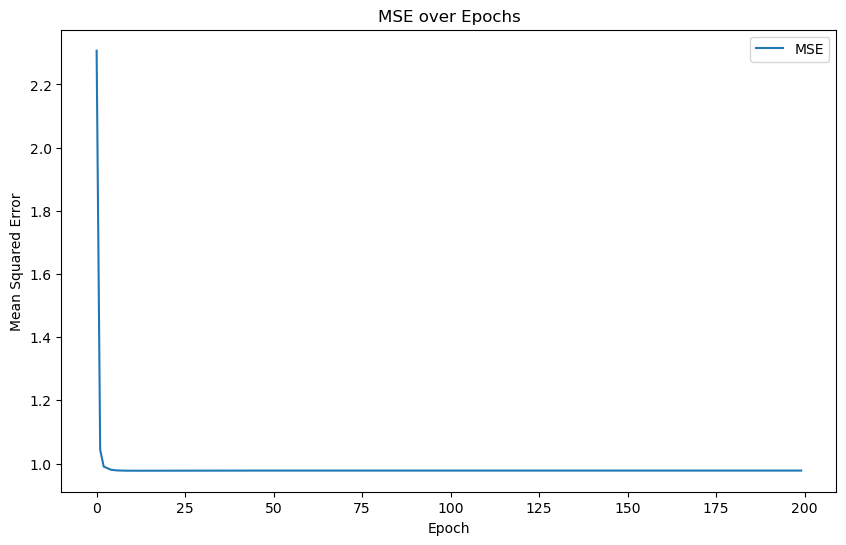

In [24]:
model = AdalineLMS(feature, label);
model.train();

In [25]:
initializer = TruncatedNormal(mean = 1.0, stddev = 0.2)(shape = (1, 2)).numpy();
initializer[0][0], type(initializer[0][1].item())

(1.0020063, float)

In [26]:
# Hyperparameters
learning_rate = 1e-1;
epochs = 200;

X_bias = numpy.c_[numpy.ones(feature.shape[0]), feature];
weights = numpy.random.default_rng().random(feature.shape[1]);

In [27]:
for i in weights:
    print(i)

0.36305007032005665
0.6455533883928183


In [28]:
X_bias, X_bias.T

(array([[1.  , 0.08, 0.72],
        [1.  , 0.26, 0.58],
        [1.  , 0.45, 0.15],
        [1.  , 0.6 , 0.3 ],
        [1.  , 0.1 , 1.  ],
        [1.  , 0.35, 0.95],
        [1.  , 0.7 , 0.65],
        [1.  , 0.92, 0.45]]),
 array([[1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
        [0.08, 0.26, 0.45, 0.6 , 0.1 , 0.35, 0.7 , 0.92],
        [0.72, 0.58, 0.15, 0.3 , 1.  , 0.95, 0.65, 0.45]]))

In [29]:
# Function to calculate net input
def net_input(X, weights):
    return numpy.dot(X, weights)

def net_input_without_style(X, weights):
    lala = [];

    for i in X:
        y_pred = (i[0] * weights[0]) + (i[1] * weights[1]);
        lala.append(y_pred);

    return lala;

# Function to calculate MSE
def mean_squared_error(y_true, y_pred):
    return numpy.mean((y_true - y_pred) ** 2)

In [30]:
for i in net_input(feature,weights):
    print(i)

0.4938424452684337
0.4688139835510493
0.26020553990294826
0.4114960587098795
0.681858395424824
0.7403432435851971
0.6737447516793715
0.6245050894712204


In [31]:
weights

array([0.36305007, 0.64555339])

In [32]:
for i in net_input_without_style(feature, weights):
    print(i);

0.4938424452684337
0.4688139835510493
0.26020553990294826
0.4114960587098795
0.681858395424824
0.7403432435851971
0.6737447516793715
0.6245050894712204


In [33]:
# Training ADALINE
mse_history = []
for epoch in range(epochs):
    output = net_input(X_bias, weights)
    errors = y - output
    weights += learning_rate * np.dot(X_bias.T, errors)
    mse = mean_squared_error(y, output)
    mse_history.append(mse)

ValueError: shapes (8,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

In [ ]:
# Plotting MSE curve
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), mse_history, label='MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE over Epochs')
plt.legend()
plt.show()

: 

In [ ]:
# Plotting decision boundary
def plot_decision_boundary(X, y, weights):
    min_x1, max_x1 = X[:, 0].min() - 1, X[:, 0].max() + 1;
    min_x2, max_x2 = X[:, 1].min() - 1, X[:, 1].max() + 1;
    x1, x2 = np.meshgrid(np.linspace(min_x1, max_x1, 200), np.linspace(min_x2, max_x2, 200));
    Z = net_input(np.c_[np.ones(x1.ravel().shape), x1.ravel(), x2.ravel()], weights).reshape(x1.shape)
    plt.contourf(x1, x2, Z, levels=[-float('inf'), 0, float('inf')], alpha=0.3, colors=['red', 'blue'])
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k', cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(X, y, weights)

# Final weights
print("Final weights (including bias):", weights)

: 